# 4. lekce - Cvičení

Seaborn dokumentace: https://seaborn.pydata.org/api.html

In [114]:
# Instalace potřebných modulů
# !python -m pip install seaborn
# !python -m pip install matplotlib

In [115]:
# Import modulů
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [116]:
# Příprava dat z minulé lekce
# url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
# url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/pokrocile-upravy/food_other.csv"
# url_food_nutrient = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
# url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"

food_sample_100 = pd.read_csv("data/food_sample_100.csv")
food_other = pd.read_csv("data/food_other.csv")
food_nutrient = pd.read_csv("data/food_nutrient.csv")
branded_food = pd.read_csv("data/branded_food.csv")

food = pd.concat([food_sample_100, food_other])
food_merged = pd.merge(food, food_nutrient, on="fdc_id")

food_merged_brands = pd.merge(food_merged, branded_food, on="fdc_id")
food_merged_brands = food_merged_brands.rename(columns={"name": "nutrient_name"})

# food_merged_brands.head(2)

In [117]:
# Příprava dat z aktuální lekce, pokud ještě nemáme
food_merged_brands["branded_food_category"] = food_merged_brands["branded_food_category"].replace({
    "Candy": "Cukrovinky",
    "Popcorn, Peanuts, Seeds & Related Snacks": "Slané snacky",
    "Cheese": "Sýry",
    "Ice Cream & Frozen Yogurt": "Zmrzlina",
    "Chips, Pretzels & Snacks": "Chipsy",
    "Cookies & Biscuits": "Sušenky",
    "Pickles, Olives, Peppers & Relishes": "Nakl. zelenina",
    "Breads & Buns": "Pečivo",
    "Fruit & Vegetable Juice, Nectars & Fruit Drinks": "Džusy",
    "Snack, Energy & Granola Bars": "En. tyčinky",
    "Chocolate": "Čokoláda",
    "Other Snacks": "Další snacky"
})

food_merged_brands["nutrient_name"] = food_merged_brands["nutrient_name"].replace({
    "Total lipid (fat)": "Lipid (tuk)", 
    "Protein": "Protein"
    })

food_list = ["Cukrovinky", "Slané snacky", "Sýry", "Zmrzlina", "Chipsy", "Sušenky", "Nakl. zelenina", "Pečivo", "Džusy", "En. tyčinky", "Čokoláda", "Další snacky"]
food_top_cat = food_merged_brands[food_merged_brands["branded_food_category"].isin(food_list)]

food_merged_brands_box = food_merged_brands[(
    food_merged_brands["nutrient_name"].isin(["Protein", "Lipid (tuk)"])) 
    & (food_merged_brands["branded_food_category"] == "En. tyčinky")
    ]

### Odstín

V rámci lekce jsme porovnávali množství proteinů a lipidů (tuků) v energetických tyčinkách. 

Potřebná data máme v tabulce `food_merged_brands`. 

Podobné srování můžeme udělat i s využitím histogramu. 

Použij funkce histogram pro tabulku `food_merged_brands_box`. 

Abys dokázal(a) rozlišit mezi oběma výživnými látkami, použij parametr `hue`, kterému zadáš jako hodnotu `nutrient_name`. 

Díky tomu bude mít každá výživná látka samostatný sloupec se svojí barvou. 

Dále použij funkci `range`, tentokrát ale rozděl hodnoty po pěti, tj. hranice intervalů budou 0, 5, 10, 15 atd. 

Zobraz si výsledný graf. 

[Text(0.5, 0, 'Množství výživných látek na 100 gramů [g]'),
 Text(0, 0.5, 'Počet potravin s daným množstvím'),
 Text(0.5, 1.0, 'Histogram množství výživných látek v en. tyčinkách')]

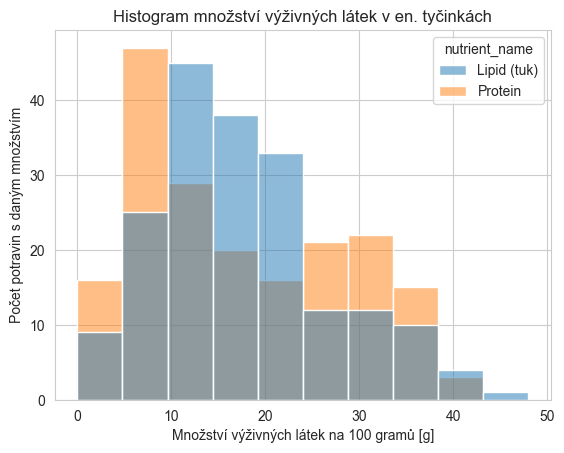

In [118]:
# Pro připomenutí: V proměnné food_merged_brands_box máme výživové údaje o proteinech a lipidech týkající pouze se energetických tyčinek

# Určení hranic intervalů parametrem bins a zadáním range
# ax = sns.histplot(food_merged_brands_box, x="amount", hue="nutrient_name", bins=range(0,100,5))

# Bonus: Určení hranic intervalů pomocí jejich šířky parametrem binwidth
ax = sns.histplot(food_merged_brands_box, x="amount", hue="nutrient_name", binwidth=5)

# Nastavíme popisky
ax.set(xlabel="Množství výživných látek na 100 gramů [g]", 
       ylabel="Počet potravin s daným množstvím", 
       title="Histogram množství výživných látek v en. tyčinkách"
       )

Protože toto zobrazení může být poněkud nepřehledné, vyzkoušej ještě přidat parametr `multiple` s hodnotou `stack`.

[Text(0.5, 0, 'Množství výživných látek na 100 gramů [g]'),
 Text(0, 0.5, 'Počet potravin s daným množstvím'),
 Text(0.5, 1.0, 'Histogram množství výživných látek v en. tyčinkách')]

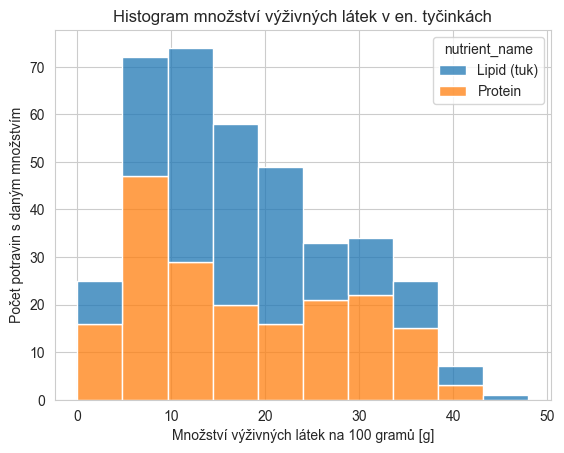

In [119]:
# ... Předchozí graf využívá výchozí nastavení multiple="layer", tzn. sloupce se překrývají

# Všechny možnosti k vyzkoušení:
# multiple_method = "layer"
multiple_method = "stack"
# multiple_method = "dodge"
# multiple_method = "fill"

ax = sns.histplot(food_merged_brands_box, x="amount", hue="nutrient_name", binwidth=5, multiple=multiple_method)

ax.set(xlabel="Množství výživných látek na 100 gramů [g]", 
       ylabel="Počet potravin s daným množstvím", 
       title="Histogram množství výživných látek v en. tyčinkách"
       )

<Axes: xlabel='amount', ylabel='Count'>

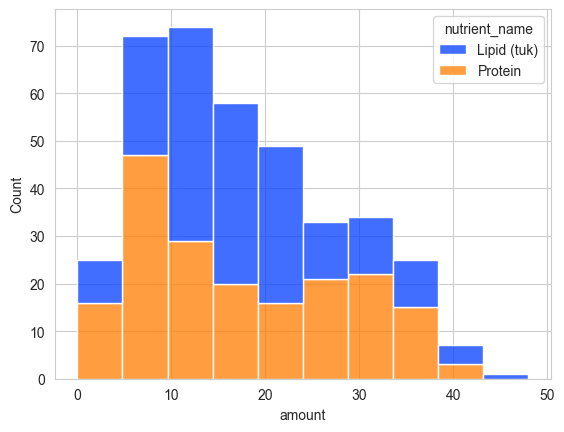

In [120]:
# Bonus: Nastavení stylu a barviček

#  - set_style: Barva pozadí, vzhled mřížky, atd.
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style("whitegrid")
# sns.set_style("darkgrid", {"grid.color": ".8", "grid.linestyle": "--"})
# sns.set_style("white")


#  - palette: Barevná škála pro zobrazení dat
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

palette_name = "bright"
# palette_name = "pastel"
# palette_name = "Set1"
# palette_name = "colorblind"


# Vyzkoušíme nastavení na histogramu
sns.histplot(food_merged_brands_box, x="amount", hue="nutrient_name", binwidth=5, multiple="stack", palette=palette_name)


# Nastavení tématu obecně pro všechny grafy
# sns.set_theme()     # Výchozí
# sns.set_theme(style="darkgrid", palette="Set2")

### Catplot
(catplot = categorical plot)


Další zajímavý graf, který `seaborn` umí, je `catplot`. Pomocí něj můžeme porovnat obsat výživných látek pro jednotlivé kategorie potravin. Tvým úkolem bude porovnat obsah proteinů a karbohydrátů pro 12 nejčastějších kategorií.

Vytvoř si pomocí dotazu tabulku, ve které budou informace pouze o proteinech a karbohydrátech. Karbohydráty hledej pod názvem `Carbohydrate, by difference`. Můžeš je přejmenovat na `Karbohydráty` pomocí metody `replace`.

In [121]:
food_top_cat["nutrient_name"] = food_top_cat["nutrient_name"].replace({"Carbohydrate, by difference": "Karbohydráty"})

food_top_cat_proteins_carbs = food_top_cat[food_top_cat["nutrient_name"].isin(["Protein", "Karbohydráty"])]

C:\Users\mapup\AppData\Local\Temp\ipykernel_19576\550420175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_top_cat["nutrient_name"] = food_top_cat["nutrient_name"].replace({"Carbohydrate, by difference": "Karbohydráty"})



Dále použij funkci `catplot`. Její použití je velmi podobné ostatním funkcím. Jako první parametr zadej tabulku s daty, jako parametr `x` sloupeček s názvem kategorie (`branded_food_category`), jako parametr `y` sloupeček `amount` a jako parametr `hue` sloupeček `nutrition_name`. Alternativně můžeš před vygenerováním grafu sloupeček `nutrition_name` přejmenovat například na `Výživná látka`, protože bude použit jako nadpis legendy.


Nech si zobrazit graf. Jednotlivé tečky představují hodnoty pro jednotlivé potraviny, každá tečka reprezentuje jednu potravinu. Barva tečky určuje, o jakou výživnou látku jde.

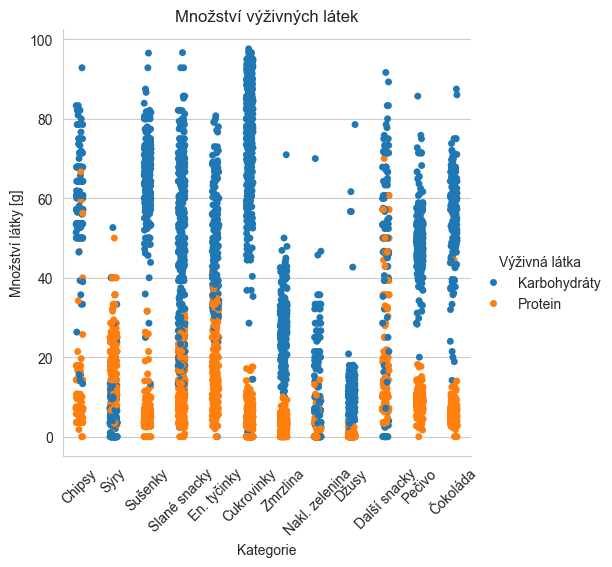

In [122]:
# Přejmenování sloupce "nutrient_name"
food_top_cat_proteins_carbs = food_top_cat_proteins_carbs.rename(columns={"nutrient_name": "Výživná látka"})

# Graf (catplot = categorical plot)
ax = sns.catplot(food_top_cat_proteins_carbs, x="branded_food_category", y="amount", hue="Výživná látka")

ax.tick_params(axis='x', rotation=45)
ax.set(xlabel="Kategorie", 
       ylabel="Množství látky [g]", 
       title="Množství výživných látek",
       # ylim=(0,200)         # Bonus: nastavení rozsahu osy
       )

Dále zkus přidat k volání funkce `catplot` parametr `s` s hodnotou 2 a podívej se, jak se graf změnil. Zkus případně i jiného hodnoty tohoto parametru.

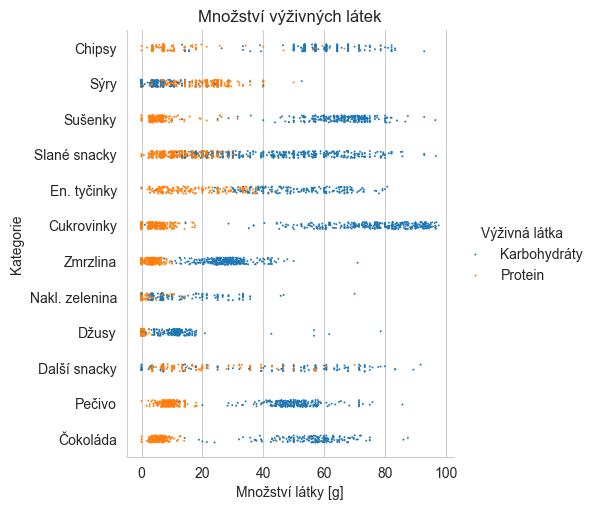

In [123]:
# Vyzkoušíme parametr s=2 (size) a rovnou prohodíme data x a y pro horizontální zobrazení:
ax = sns.catplot(food_top_cat_proteins_carbs, x="amount", y="branded_food_category", hue="Výživná látka", s=2)

ax.set(xlabel="Množství látky [g]", 
       ylabel="Kategorie", 
       title="Množství výživných látek")

# Bonus: Uložení grafu do souboru
ax.savefig("data/vyzivny_catplot.png")


Prohlédni si graf a odpověz na otázky:

- Pro jakou kategorii platí, že drtivá většina výrobků má více proteinů než karbohydrátů?
    - -> Sýry
- Pro jakou kategorii platí, že drtivá většina výrobků má více karbohydrátů než proteinů?
    - -> Cukrovinky, případně i čokoláda, pečivo, apod.
- Existuje nějaká kategorie, kde je na výběr alespoň několik produktů s větším množství karbohydrátů než proteinů, ale i několik produktů s větším množstvím proteinů než karbohydrátů?
    - -> Třeba sýry, chipsy nebo další snacky